In [1]:
from xml.etree.ElementTree import PI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import os
import random
import seaborn as sns
import csv
import collections
from keras.preprocessing.image import load_img
from matplotlib.pyplot import figure
from tensorflow.python.client import device_lib
#from tensorflow.keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras import backend as K

print(device_lib.list_local_devices())
warnings.filterwarnings('ignore')

mypath = "C:/Users/sager/OneDrive/Desktop/CS5824/Project/Models/cat_dog_classifier/cat_dog_classifier/kagglecatsanddogs_3367a/petfinder-pawpularity-score"
files = [os.path.splitext(filename)[0] for filename in os.listdir(mypath + "/train")]
#print(files)

filetr = open(mypath + "/train.csv")
csvreadertr = csv.reader(filetr)

tr_data = []
for row in csvreadertr:
    tr_data.append((row[0], row[13]))
del tr_data[0]

assert(collections.Counter(list(zip(*tr_data))[0]) == collections.Counter(files))

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14272121512845037947
xla_global_id: -1
]


In [2]:
df = pd.DataFrame()
df['images'] = files
df['label'] = list(zip(*tr_data))[1]
df['label'] = df['label'].astype(int)
#df = df.sample(frac=1).reset_index(drop=True)
#df.head()
#print(df)

#testlabs = to_categorical(df['label'])
#print(np.sum(np.array(testlabs)))
#print(testlabs)

[100, 55, 20, 72, 22, 23, 16, 26, 65, 22, 19, 45, 3, 78, 25, 11, 22, 47, 63, 36, 47, 32, 38, 43, 23]


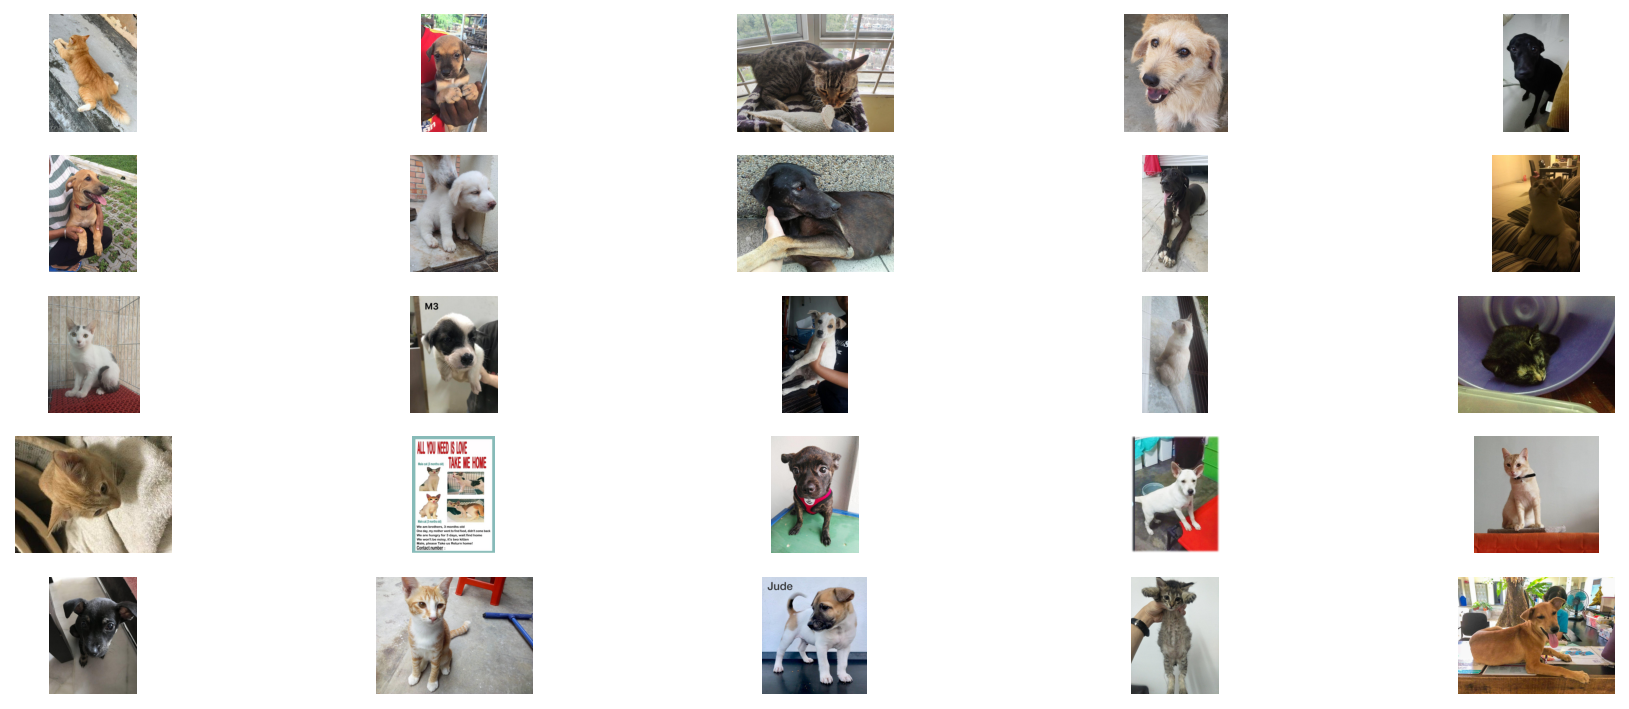

In [3]:
# Exploratory Data Analysis (dogs)
figure(figsize = (15, 6), dpi = 150)
#plt.figure(figsize=(10,7)) # display grid of images
temp = df['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

#TODO: figure out how to put ratings beneath each image
ratings = []
for index,file in enumerate(files):    
    plt.subplot(5,5,index+1)
    img = load_img(mypath + "/train/" + file + ".jpg")
    img = np.array(img)
    plt.imshow(img)
    plt.axis('off')
    ratings.append(np.array(df['label'][df['images'] == file])[0])

print(ratings)

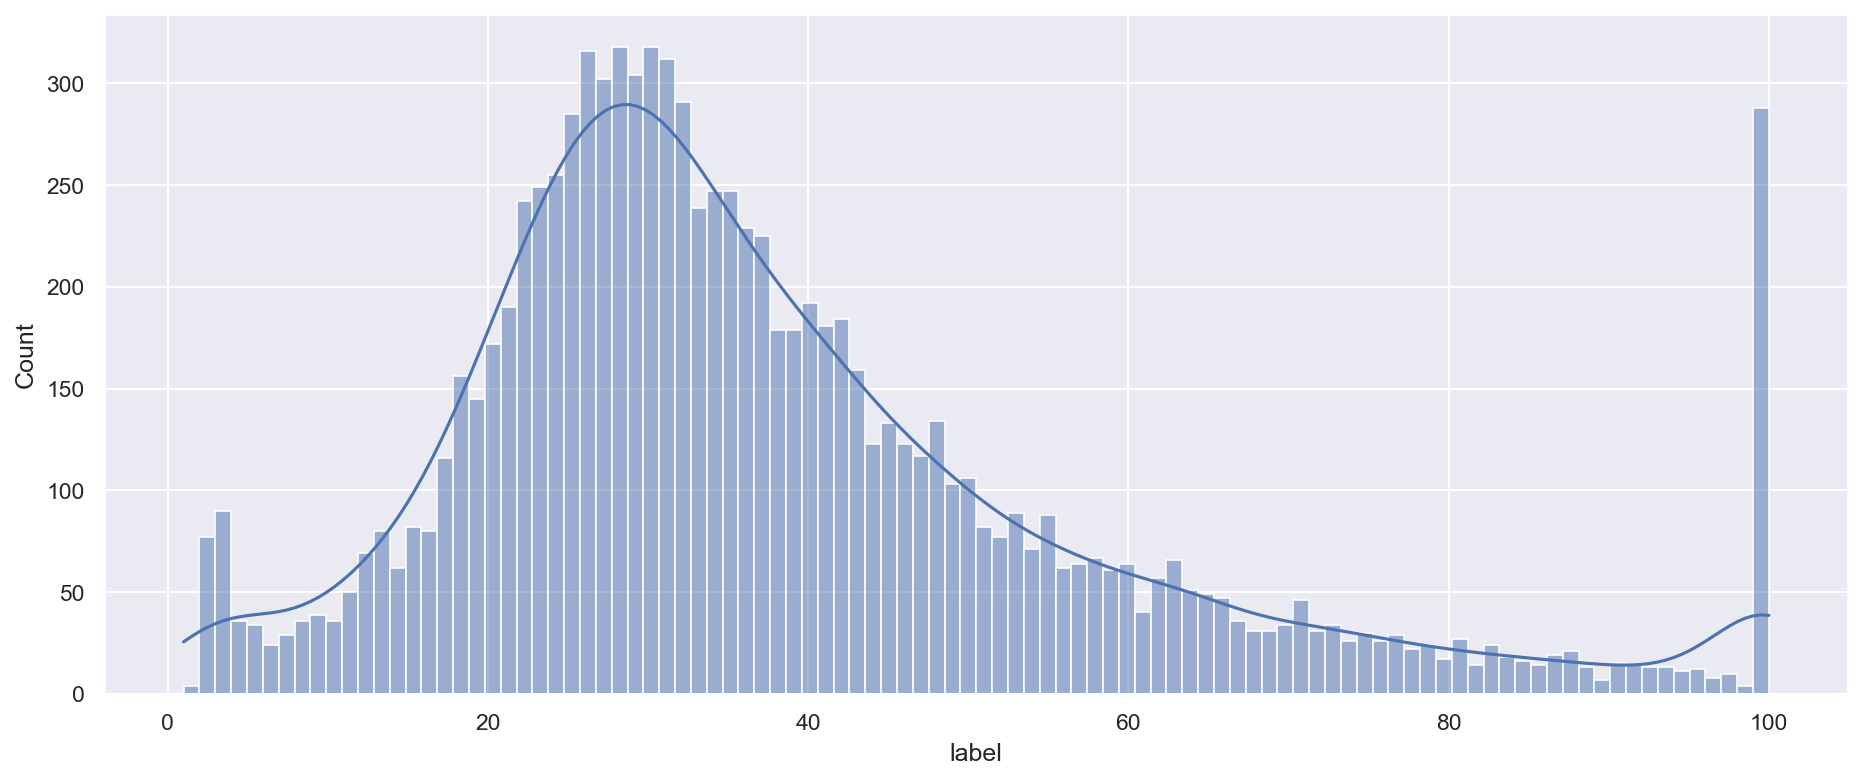

In [5]:
# show the total count for each of the labels
figure(figsize = (15, 6), dpi = 150)
sns.set(style="darkgrid")
ax = sns.histplot(df, x = 'label', bins = 100, kde = True)
plt.show()

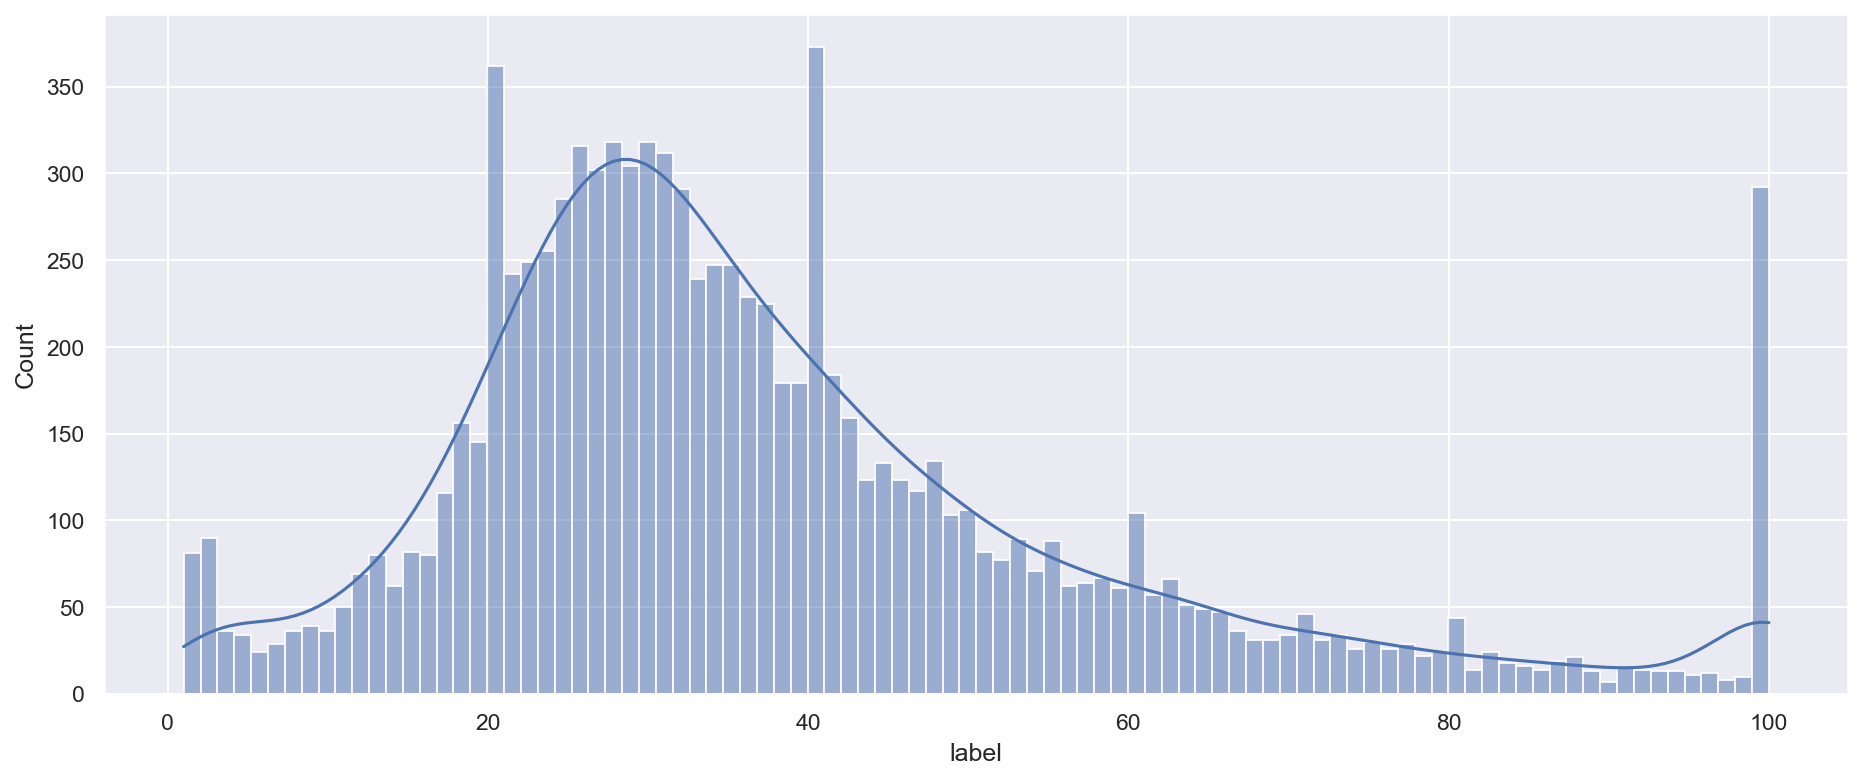

In [6]:
#df = df[(df['label'] < 100) & (df['label'] > 5)]
figure(figsize = (15, 6), dpi = 150)
sns.set(style="darkgrid")
ax = sns.histplot(df, x = 'label', bins = 94, kde = True)
plt.show()

In [7]:
print(df[df['label'] == 5])
print(df[df['label'] == 100])

                                images  label
244   06a6c682c8042ba462bbb4cd2305bcbd      5
284   07c58f193424517a7c4e1279e09b8c0c      5
393   0a51fa22c7b84249889d1e157c54c11f      5
476   0cb44295fe5d7c2b4abaa02376c65b43      5
1361  22d14698a4a18ab79db253713c298a05      5
1557  27c207f94044c5255277a4143dcf5f5e      5
1693  2b0ea572f6b234340b08cee2f5a06e3f      5
1811  2de3bf4fdcefa2f3c5e5b77fa1e3d262      5
1934  317d3d7707bb1c8aba79e57763bab11c      5
2053  34dc983bbf8b3b102eb268d9f572999b      5
2265  3a4c5720a88248353e1d1c9986804e45      5
2391  3d946559e2b4b210a06e9103b0dd72e9      5
2907  4b0fedfdf53c4383aa19f2b040b3232c      5
3299  551f605f8f2415db69d5f5e750deedae      5
3430  58b63c25c86a40f2120cf2f8f1237fa2      5
3463  5988763f72db654577b4c58724823f8a      5
3880  62d74b5f0ffac552f53e3db5c2a2dffd      5
4197  6b3095627abbdfc50a1cd5c7dd86cec8      5
4683  786a35ac0e6f8c2a7216ea7e551b23b4      5
4690  78a02b3cb6ed38b2772215c0c0a7f78e      5
5164  853e2f755ef373dfc5f28f617d4c

In [4]:
df['images'] = mypath + "/train/" + df['images'] + ".jpg" 
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=11)
#print(train.iloc[0][0])
#print(test['images'])

In [44]:
#df['label'] = df['label'].astype('str')
#train['label'] = train['label'].astype('str')
#test['label'] = test['label'].astype('str')

In [9]:
print(train['label'])

9900    20
117     46
7672    28
5522    29
1218    35
        ..
1293    22
4023    63
7259    61
5200    29
3775    15
Name: label, Length: 7929, dtype: int32


In [5]:
from keras.applications import resnet
from keras.applications.resnet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

resnet50 = resnet.ResNet50(include_top=False)

In [6]:

train_generator = ImageDataGenerator(
    rescale = 1./255, # normalize the image 
    rotation_range = 360, # augmentation of images (helps to avoid overfitting)
    width_shift_range=0.35,
    height_shift_range=0.35,
    shear_range = 0.35,
    zoom_range = 0.35,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
)

val_generator = ImageDataGenerator(rescale=1./255)

# TODO: can't seem to find documentation on what target_size does under hood
train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(224,224), 
    batch_size=128, 
    class_mode='raw'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(224,224), 
    batch_size=128, 
    class_mode='raw'
)

Found 7929 validated image filenames.
Found 1983 validated image filenames.



model2 = Sequential([
    Conv2D(64, (7,7), activation='relu', input_shape=(128,128,3)),
    MaxPool2D((3,3)),
    Conv2D(16, (5,5), activation='relu'),
    MaxPool2D((3,3)),
    Conv2D(16, (4,4), activation='relu'),
    Conv2D(16, (2,2), activation='relu'),
    #Conv2D(256, (2,2), activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dropout(rate = 0.25),    
    Dense(2048, activation='sigmoid'),    
    Dense(1, activation='linear'),
])

In [12]:
# added tanh and doubled filters and made batch 1k
from keras.applications import resnet
my_new_model = Sequential()
my_new_model.add(resnet.ResNet50(include_top=False, pooling='avg'))
my_new_model.add(Dense(2048, activation='relu'))
my_new_model.add(Dense(1024, activation='relu'))
my_new_model.add(Dense(512, activation='relu'))
my_new_model.add(Dense(256, activation='relu'))
my_new_model.add(Dense(1, activation='linear'))

import tensorflow as tf
my_new_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()])


K.set_value(my_new_model.optimizer.learning_rate, 0.001)
my_new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 30,538,625
Trainable params: 30,485,505
No

In [49]:
#history = my_new_model.fit(train_iterator, epochs=50, validation_data=val_iterator, shuffle=True)

Epoch 1/50
62/62 [==============================] - 1463s 23s/step - loss: 520.5905 - root_mean_squared_error: 22.8165 - val_loss: 426.2267 - val_root_mean_squared_error: 20.6453
Epoch 2/50
62/62 [==============================] - 1371s 22s/step - loss: 447.9720 - root_mean_squared_error: 21.1653 - val_loss: 532.6804 - val_root_mean_squared_error: 23.0799
Epoch 3/50
62/62 [==============================] - 1380s 22s/step - loss: 436.9255 - root_mean_squared_error: 20.9028 - val_loss: 517.3020 - val_root_mean_squared_error: 22.7443
Epoch 4/50
62/62 [==============================] - 1360s 22s/step - loss: 435.5771 - root_mean_squared_error: 20.8705 - val_loss: 417.8494 - val_root_mean_squared_error: 20.4414
Epoch 5/50
62/62 [==============================] - 1379s 22s/step - loss: 437.1275 - root_mean_squared_error: 20.9076 - val_loss: 423.6852 - val_root_mean_squared_error: 20.5836
Epoch 6/50
62/62 [==============================] - 1360s 22s/step - loss: 432.9455 - root_mean_squared_e

In [45]:
#my_new_model.save('./res50')

INFO:tensorflow:Assets written to: ./res50_50plus10\assets


In [ ]:
# Visualization of Results
accuracy = history.history['root_mean_squared_error']
val_acc = history.history['val_root_mean_squared_error']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()


print(val_acc)

In [51]:
# save model and outputs
#np.savetxt('data.csv', (accuracy, val_acc, loss, val_loss), delimiter=',')
#model.save('seventeen_hr.h5')

In [54]:
#respred = my_new_model.predict(val_iterator)

In [7]:
import keras
loaded_model = keras.models.load_model('./res50')

In [37]:
#history_cont = loaded_model.fit(train_iterator, epochs=10, validation_data=val_iterator, shuffle=True)

Epoch 1/10
62/62 [==============================] - 1757s 28s/step - loss: 406.2149 - root_mean_squared_error: 20.1548 - val_loss: 444.0378 - val_root_mean_squared_error: 21.0722
Epoch 2/10
62/62 [==============================] - 1705s 28s/step - loss: 406.7685 - root_mean_squared_error: 20.1685 - val_loss: 932.1892 - val_root_mean_squared_error: 30.5318
Epoch 3/10
62/62 [==============================] - 1802s 29s/step - loss: 401.9982 - root_mean_squared_error: 20.0499 - val_loss: 426.1909 - val_root_mean_squared_error: 20.6444
Epoch 4/10
62/62 [==============================] - 1718s 28s/step - loss: 403.0507 - root_mean_squared_error: 20.0761 - val_loss: 458.8684 - val_root_mean_squared_error: 21.4212
Epoch 5/10
62/62 [==============================] - 1751s 28s/step - loss: 401.0259 - root_mean_squared_error: 20.0256 - val_loss: 418.5075 - val_root_mean_squared_error: 20.4575
Epoch 6/10
62/62 [==============================] - 1788s 29s/step - loss: 405.4040 - root_mean_squared_e

In [ ]:
K.set_value(my_new_model.optimizer.learning_rate, 0.001)
history_cont = loaded_model.fit(train_iterator, epochs=20, validation_data=val_iterator, shuffle=True)

In [54]:
loaded_model.save('./res50_110')

INFO:tensorflow:Assets written to: ./res50_90\assets


In [52]:
# Pointless b/c it's already being used...we won't have a test set
# loaded_model.evaluate_generator(val_iterator)

[409.861572265625, 20.245038986206055]

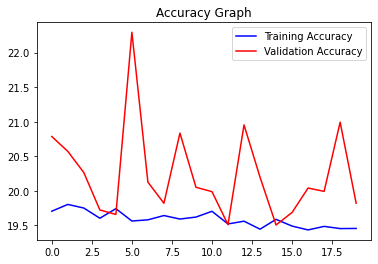

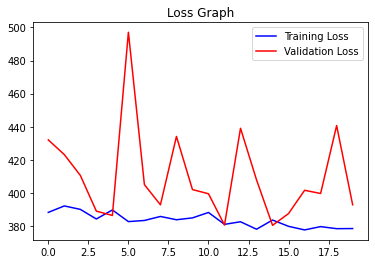

[20.786571502685547, 20.57157325744629, 20.264511108398438, 19.72480010986328, 19.65900993347168, 22.294818878173828, 20.126493453979492, 19.821517944335938, 20.836408615112305, 20.052284240722656, 19.989301681518555, 19.511323928833008, 20.95430564880371, 20.19719696044922, 19.506851196289062, 19.688520431518555, 20.04149627685547, 19.99312973022461, 20.9935245513916, 19.821863174438477]


In [56]:
# Visualization of Results
accuracy = history_cont.history['root_mean_squared_error']
val_acc = history_cont.history['val_root_mean_squared_error']
epochs = range(20)

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history_cont.history['loss']
val_loss = history_cont.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

print(val_acc)

#this doesn't work because imagedatagenerator doesnt return a real iterator, and this will loop forever; instead, use evaluate_generator and predict_generator
test_true = []
test_pred = []
accum = 0

from sklearn.metrics import mean_squared_error

counter  = 0

for item in val_iterator:

    pr = loaded_model.predict(item[0]).flatten()
    test_pred.append(pr)
    #print(pr, item[1])
    test_true.append(item[1])
    accum += mean_squared_error(pr, item[1]) * pr.shape[0]

    counter += 1
    if counter % 100 == 0:
        print(counter)

    #if counter == 3:
    #    break

    #for im in range(item[1].shape[0]):

        #test_true.append(item[1][im])
        #sum += item[1][im]
        #print(item[1][im])

        #test_pred.append(my_new_model.predict(item[0][im]))



test_pred[0].shape[0]
leng = 0
for batch in test_pred:
    leng += batch.shape[0]
np.sqrt(accum/leng)